In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## 데이터 변환

In [2]:
n_samples = 10
height = 3*np.random.randn(n_samples).round() + 170
nationality = np.random.randint(0,3,n_samples)

In [8]:
height, nationality

(array([170., 173., 170., 167., 167., 167., 173., 170., 164., 167.]),
 array([1, 2, 1, 0, 1, 1, 0, 2, 2, 2]))

In [9]:
p = list(zip(height, nationality))
p

[(170.0, 1),
 (173.0, 2),
 (170.0, 1),
 (167.0, 0),
 (167.0, 1),
 (167.0, 1),
 (173.0, 0),
 (170.0, 2),
 (164.0, 2),
 (167.0, 2)]

In [10]:
df = pd.DataFrame(list(zip(height, nationality)), 
                  columns=["height","nationality"])
df.head()

,height,nationality
0,170.0,1
1,173.0,2
2,170.0,1
3,167.0,0
4,167.0,1


In [11]:
q = np.vstack((height, nationality)).T
q

array([[170.,   1.],
       [173.,   2.],
       [170.,   1.],
       [167.,   0.],
       [167.,   1.],
       [167.,   1.],
       [173.,   0.],
       [170.,   2.],
       [164.,   2.],
       [167.,   2.]])

In [14]:
df2 = pd.DataFrame(q, columns=["height","nationality"])
df2.head()

,height,nationality
0,170.0,1.0
1,173.0,2.0
2,170.0,1.0
3,167.0,0.0
4,167.0,1.0


In [15]:
nat = pd.get_dummies(df['nationality'], prefix='nat_')

In [16]:
nat

,nat__0,nat__1,nat__2
0,0,1,0
1,0,0,1
2,0,1,0
3,1,0,0
4,0,1,0
5,0,1,0
6,1,0,0
7,0,0,1
8,0,0,1
9,0,0,1


In [17]:
new_df = pd.concat([df, nat], axis=1); new_df.head()

,height,nationality,nat__0,nat__1,nat__2
0,170.0,1,0,1,0
1,173.0,2,0,0,1
2,170.0,1,0,1,0
3,167.0,0,1,0,0
4,167.0,1,0,1,0


In [18]:
new_df.drop('nationality', axis=1, inplace=True)

In [19]:
new_df

,height,nat__0,nat__1,nat__2
0,170.0,0,1,0
1,173.0,0,0,1
2,170.0,0,1,0
3,167.0,1,0,0
4,167.0,0,1,0
5,167.0,0,1,0
6,173.0,1,0,0
7,170.0,0,0,1
8,164.0,0,0,1
9,167.0,0,0,1


# 스케일링
## 표준 스케일링

In [22]:
n_samples = 10
height = 3*np.random.randn(n_samples).round(1) + 170
weight = 4*np.random.randn(n_samples).round(1) + 70

X = pd.DataFrame(list(zip(height, weight)))

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() # (1)모델 생성
sc.fit(X) # (2) 훈련
x_scale = sc.transform(X) # (3) 사용
x_scale

# x_scale = sc.fit_transform(X) # (2), (3) 사용


array([[-0.02870058,  1.21051562],
       [ 1.40632837, -2.03416543],
       [-0.02870058,  0.5865385 ],
       [ 1.11932258, -1.03580203],
       [ 0.83231679,  1.33531105],
       [-0.60271216, -0.28702948],
       [ 0.97581968, -0.53662033],
       [-1.17672373,  0.21215222],
       [-1.60723242,  0.83612935],
       [-0.88971795, -0.28702948]])

In [24]:
sc.mean_

array([169.16,  69.72])

In [25]:
sc.scale_

array([2.09055017, 3.2052457 ])

In [26]:
x=X.values; x

array([[169.1,  73.6],
       [172.1,  63.2],
       [169.1,  71.6],
       [171.5,  66.4],
       [170.9,  74. ],
       [167.9,  68.8],
       [171.2,  68. ],
       [166.7,  70.4],
       [165.8,  72.4],
       [167.3,  68.8]])

In [27]:
x_std = StandardScaler().fit_transform(x);x_std

array([[-0.02870058,  1.21051562],
       [ 1.40632837, -2.03416543],
       [-0.02870058,  0.5865385 ],
       [ 1.11932258, -1.03580203],
       [ 0.83231679,  1.33531105],
       [-0.60271216, -0.28702948],
       [ 0.97581968, -0.53662033],
       [-1.17672373,  0.21215222],
       [-1.60723242,  0.83612935],
       [-0.88971795, -0.28702948]])

## 확률 분포

In [46]:
#Generating normally distributed data

df = pd.DataFrame({
    'x1': np.random.normal(0, 2, 10000),
    'x2': np.random.normal(5, 3, 10000),
    'x3': np.random.normal(-5, 5, 10000)
})

In [47]:
df

,x1,x2,x3
0,-2.386209,5.219589,-6.519338
1,-1.884113,2.712926,-2.978808
2,3.432931,2.639245,-2.410752
3,2.908785,2.866865,-3.204681
4,-2.332934,10.030658,-1.558068
...,...,...,...
9995,0.300854,13.597643,-14.422920
9996,3.412550,7.946727,-10.320553
9997,-2.282055,6.657127,-7.191188
9998,-2.777995,2.232606,-0.923763


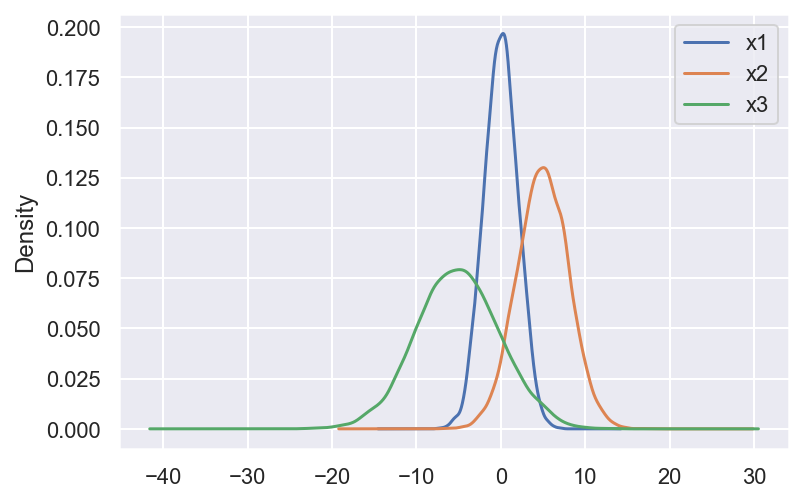

In [50]:
# plotting data

df.plot.kde()

In [51]:
from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler()
data_tf = standardscaler.fit_transform(df)
df = pd.DataFrame(data_tf, columns=['x1','x2','x3'])

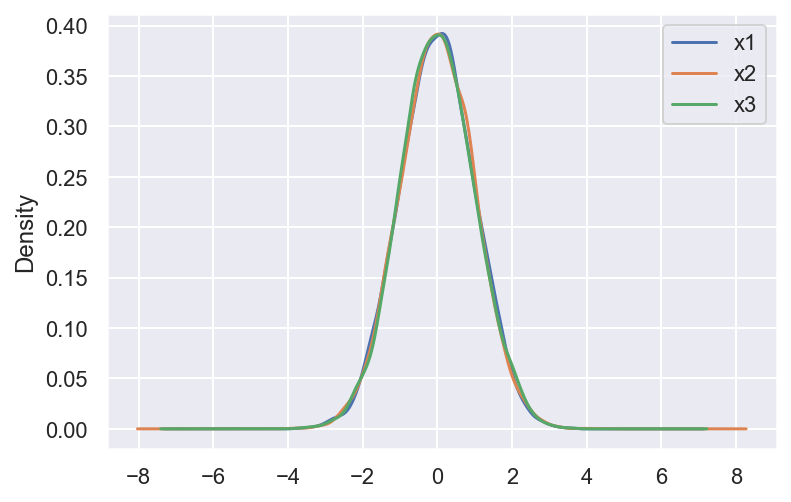

In [52]:
df.plot.kde()

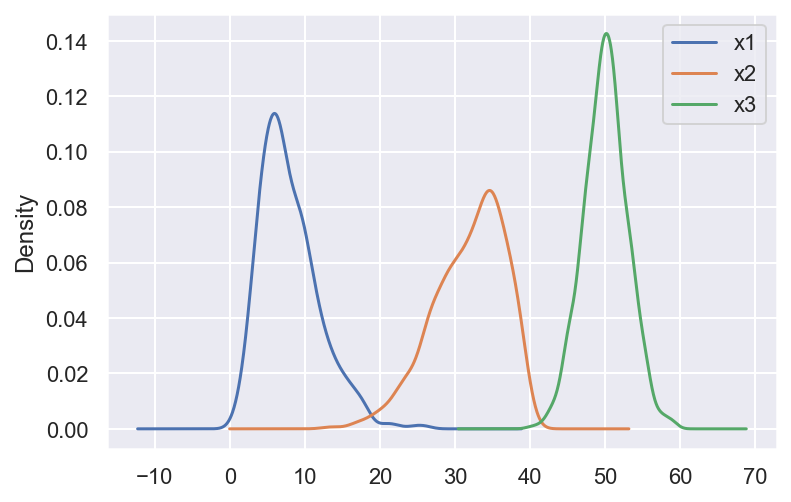

In [53]:
df = pd.DataFrame({
    # positive skew
    'x1': np.random.chisquare(8, 1000),
    # negative skew 
    'x2': np.random.beta(8, 2, 1000) * 40,
    # no skew
    'x3': np.random.normal(50, 3, 1000)
})

df.plot.kde()

In [54]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
data_tf = minmax.fit_transform(df)

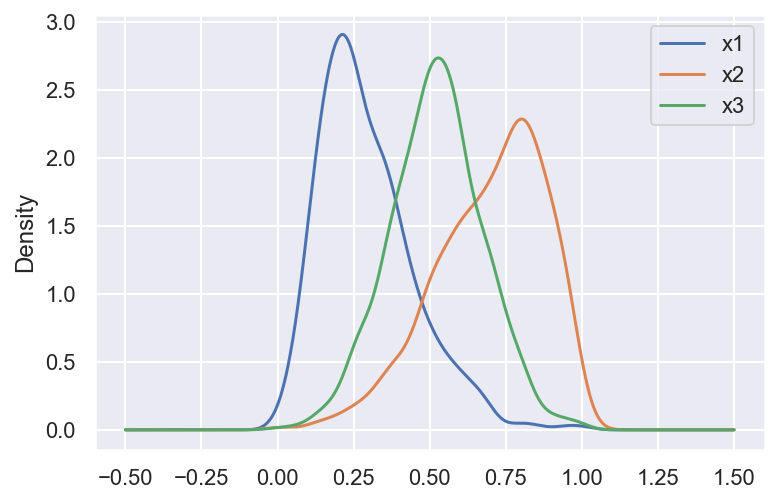

In [55]:
df = pd.DataFrame(data_tf,columns=['x1','x2','x3'])
df.plot.kde()

In [56]:
df = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 1, 1000), np.random.normal(1, 1, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 1, 1000), np.random.normal(50, 1, 25)]),
})

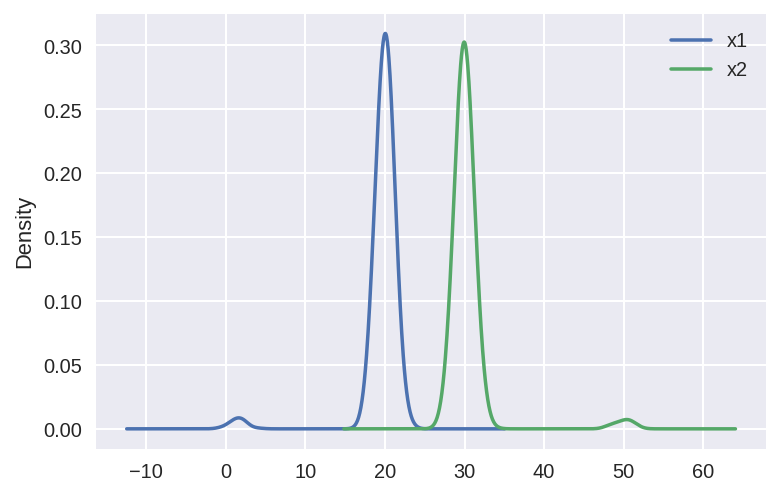

In [0]:
df.plot.kde()

In [57]:
from sklearn.preprocessing import RobustScaler
robustscaler = RobustScaler()

data_tf = robustscaler.fit_transform(df)
df1 = pd.DataFrame(data_tf, columns=['x1','x2'])

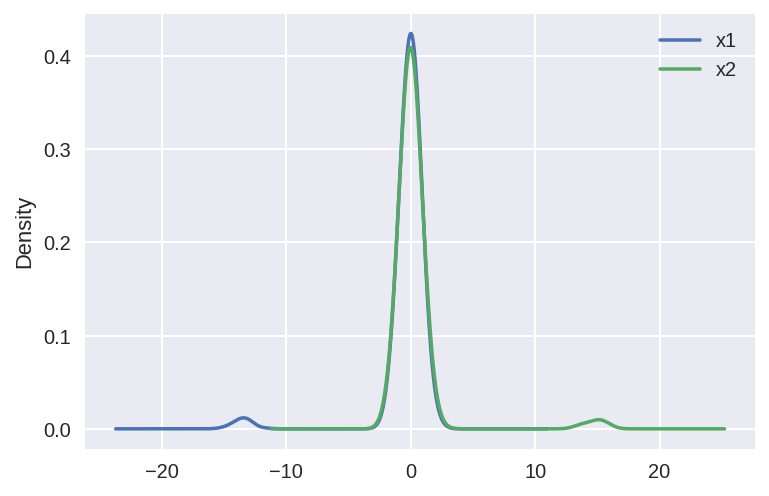

In [0]:
df1.plot.kde()

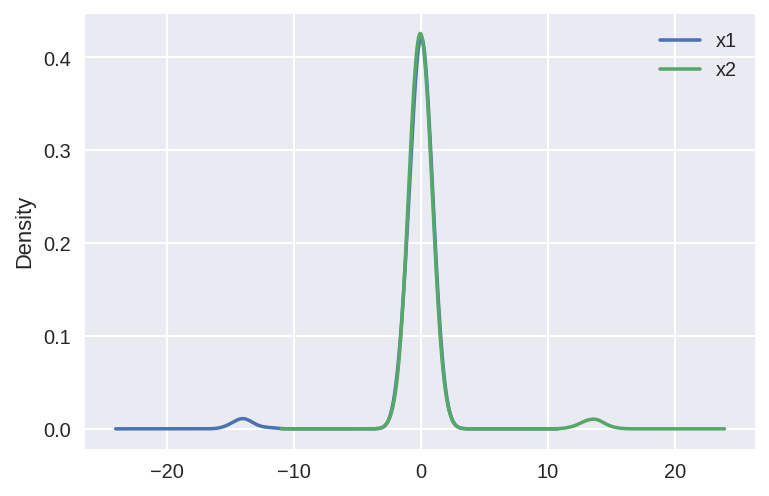

In [58]:
data_tf = standardscaler.fit_transform(df)
df2 = pd.DataFrame(data_tf, columns=['x1','x2'])

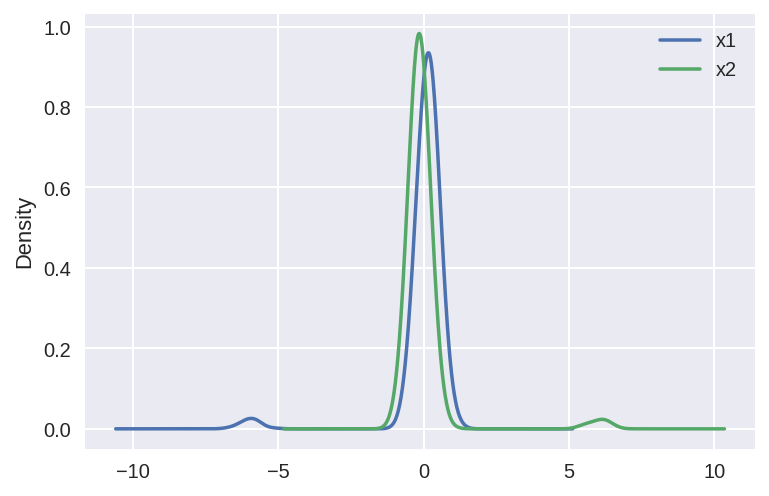

In [0]:
df2.plot.kde()

In [59]:
minmax = MinMaxScaler()
data_tf = minmax.fit_transform(df)
df3 = pd.DataFrame(data_tf, columns=['x1','x2'])

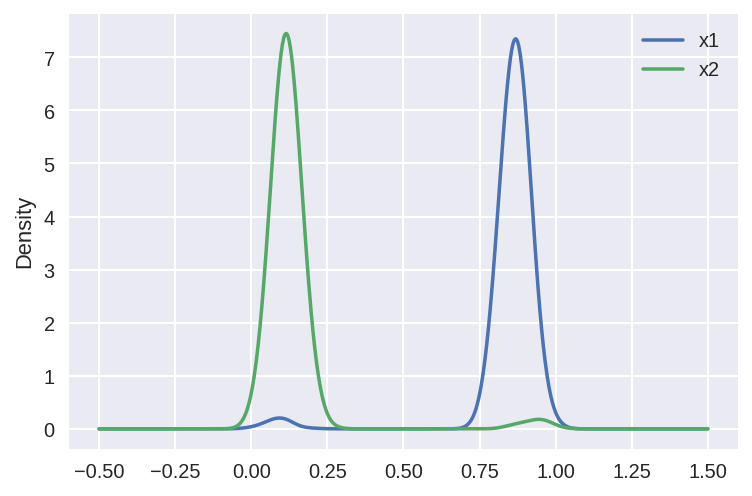

In [0]:
df3.plot.kde()